<a href="https://colab.research.google.com/github/devadathprabhu/DSC613/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
df_canada = pd.read_excel('/content/drive/MyDrive/BDA/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [ ]:
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_canada.rename(
    columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'},
    inplace=True)
df_canada['Total'] = df_canada.sum(axis=1)

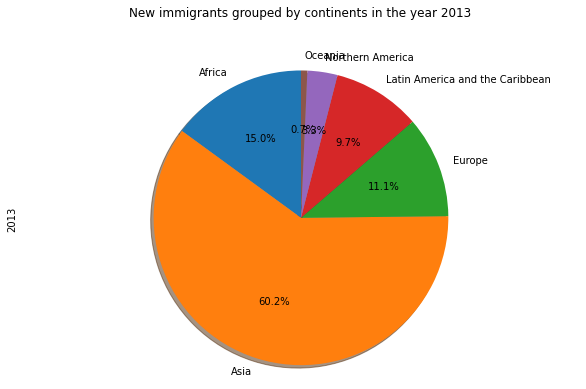

In [ ]:
df_q1 = df_canada
df_continents = df_q1.groupby('Continent', axis=0).sum()
df_continents[2013].plot(kind='pie', figsize=(10, 6),
                            autopct='%1.1f%%', startangle=90)
plt.title('New immigrants grouped by continents in the year 2013', y=1.1) 
plt.axis('equal')
plt.show()

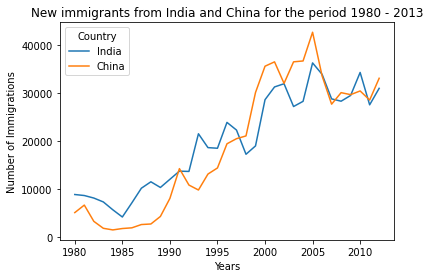

In [ ]:
df_q2 = df_canada
df_q2.set_index('Country', inplace=True)
df_q2.columns = list(map(str, df_q2.columns))
years = list(map(str, range(1980, 2013)))
df = df_q2.loc[['India','China'],years]
df = df.transpose()
df.index = df.index.map(int)
df.plot(kind='line')
plt.title('New immigrants from India and China for the period 1980 - 2013')
plt.ylabel('Number of Immigrations')
plt.xlabel('Years')
plt.show()

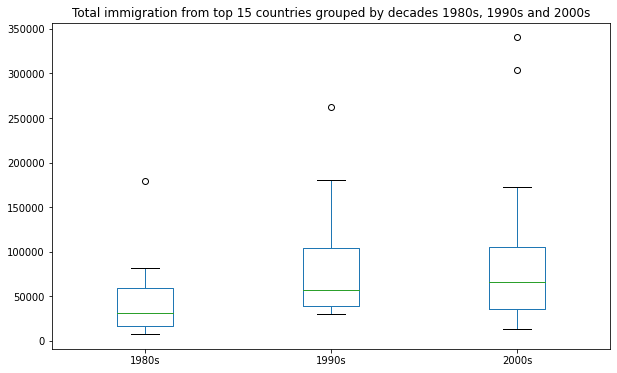

In [ ]:
df_q3 = df_canada
df_top15 = df_q3.sort_values(['Total'], ascending=False, axis=0).head(15)
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010)))
df_top15_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_top15_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_top15_00s = df_top15.loc[:, years_00s].sum(axis=1)
new_df = pd.DataFrame(
    {'1980s': df_top15_80s, '1990s': df_top15_90s, '2000s':df_top15_00s})
new_df.plot(kind='box', figsize=(10, 6))
plt.title(
    'Total immigration from top 15 countries grouped by decades 1980s, 1990s and 2000s')
plt.show()

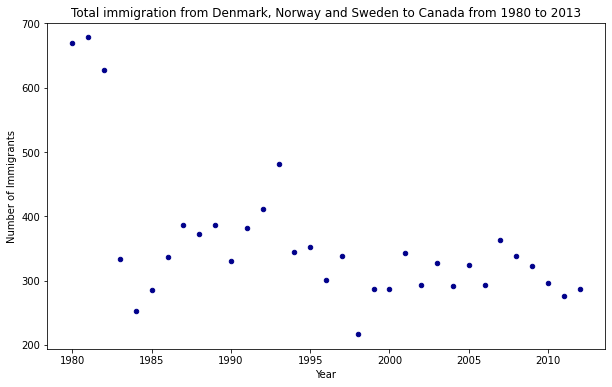

In [ ]:
df_q4 = df_canada
df_countries = df_q4.loc[['Denmark', 'Norway', 'Sweden'],years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')
plt.title('Total immigration from Denmark, Norway and Sweden to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()